In [175]:
import numpy as np
import pandas as  pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [176]:
df1 =  pd.read_csv('Train.csv')
df2 =  pd.read_csv('Train_V2.csv')
df3 =  pd.read_csv('Train_V3.csv')

# reading the file and adding a colmn 1 with it and fill that colmn with one for further analysis

In [177]:
from pandas import read_excel
my_sheet = 'Sheet1' 
file_name = 'Festival_Dates.xlsx' 
df4 = read_excel(file_name, sheet_name = my_sheet)
#df4=df4.rename(columns={'Date':'Sales_date'})
df4['holiday']='1'
df4

,Dates,Importance,holiday
0,2015-01-01,NewYearPeriod,1
1,2015-01-26,Republic Day,1
2,2015-03-06,Holi_Day,1
3,2015-03-21,GudiPadwa,1
4,2015-08-15,Independence Day,1
5,2015-10-22,Dushhera,1
6,2015-11-09,Dhanteras,1
7,2015-12-25,MerryChristmas,1
8,2015-12-31,Christmas LastDay,1
9,2016-01-01,NewYearPeriod,1


In [178]:
df4=df4.rename(columns={'Dates':'Sales_date'})
type(df4['Sales_date'])

pandas.core.series.Series

# calculating nan data percentage and data type of columns


In [179]:
total = df1.isnull().sum().sort_values(ascending=False)
percent = ((df1.isnull().sum()/len(df1))*100).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
nan=missing_data[missing_data["Total"]>0].index
missing_data=missing_data[missing_data["Total"]>0]
nan=pd.DataFrame(nan, columns=['nan col'])
nan
j=[]
for i in nan['nan col']:
    j.append(df1[i].dtype)
j=pd.DataFrame(j,columns=['type'])
nan=pd.concat([nan,j],axis=1).set_index('nan col')
nan=pd.concat([missing_data,nan],axis=1)
nan

,Total,Percent,type
nan col,,,


In [180]:
df2

,subsegment,Sales_date,Qty
0,32 inch,01-01-2016,190.0
1,32 inch,02-01-2016,285.0
2,32 inch,03-01-2016,285.0
3,32 inch,04-01-2016,209.0
4,32 inch,05-01-2016,133.0
...,...,...,...
2900,NaN,NaN,NaN
2901,NaN,NaN,NaN
2902,NaN,NaN,NaN
2903,NaN,NaN,NaN


In [181]:
df2=df2.dropna()

In [182]:
df2

,subsegment,Sales_date,Qty
0,32 inch,01-01-2016,190.0
1,32 inch,02-01-2016,285.0
2,32 inch,03-01-2016,285.0
3,32 inch,04-01-2016,209.0
4,32 inch,05-01-2016,133.0
...,...,...,...
2869,55 inch,27-07-2018,247.0
2870,55 inch,28-07-2018,285.0
2871,55 inch,29-07-2018,209.0
2872,55 inch,30-07-2018,247.0


# calculating nan data percentage and data type of columns

In [183]:
total = df2.isnull().sum().sort_values(ascending=False)
percent = ((df2.isnull().sum()/len(df2))*100).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
nan=missing_data[missing_data["Total"]>0].index
missing_data=missing_data[missing_data["Total"]>0]
nan=pd.DataFrame(nan, columns=['nan col'])
nan
j=[]
for i in nan['nan col']:
    j.append(df2[i].dtype)
j=pd.DataFrame(j,columns=['type'])
nan=pd.concat([nan,j],axis=1).set_index('nan col')
nan=pd.concat([missing_data,nan],axis=1)
nan

,Total,Percent,type
nan col,,,


# calculating nan data percentage and data type of columns

In [184]:
total = df3.isnull().sum().sort_values(ascending=False)
percent = ((df3.isnull().sum()/len(df3))*100).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
nan=missing_data[missing_data["Total"]>0].index
missing_data=missing_data[missing_data["Total"]>0]
nan=pd.DataFrame(nan, columns=['nan col'])
nan
j=[]
for i in nan['nan col']:
    j.append(df3[i].dtype)
j=pd.DataFrame(j,columns=['type'])
nan=pd.concat([nan,j],axis=1).set_index('nan col')
nan=pd.concat([missing_data,nan],axis=1)
nan

,Total,Percent,type
nan col,,,


In [185]:
df3

,subsegment,Sales_date,Qty
0,32 inch,01-01-2016,190
1,32 inch,02-01-2016,285
2,32 inch,03-01-2016,285
3,32 inch,04-01-2016,209
4,32 inch,05-01-2016,133
...,...,...,...
962,32 inch,27-08-2018,114
963,32 inch,28-08-2018,19
964,32 inch,29-08-2018,76
965,32 inch,30-08-2018,152


# merge df1,df2,df3 into df and delete dplicate record


In [186]:
df=pd.concat([df1,df2,df3], axis=0)

In [187]:
df.Sales_date[1]

1    02-01-2016
1    02-01-2016
1    02-01-2016
Name: Sales_date, dtype: object

In [188]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
nan=missing_data[missing_data["Total"]>0].index
missing_data=missing_data[missing_data["Total"]>0]
nan=pd.DataFrame(nan, columns=['nan col'])
nan
j=[]
for i in nan['nan col']:
    j.append(df[i].dtype)
j=pd.DataFrame(j,columns=['type'])
nan=pd.concat([nan,j],axis=1).set_index('nan col')
nan=pd.concat([missing_data,nan],axis=1)
nan

,Total,Percent,type
nan col,,,


In [189]:
df=df.reset_index()

In [190]:
df.drop(['index'],axis=1,inplace=True)

In [191]:
from datetime import datetime

#df['Sales_date'] = datetime.strptime(df['Sales_date'],'%d.%m.%y').strftime('%Y-%m-%d')
df['Sales_date'] = pd.to_datetime(df['Sales_date']).dt.strftime('%Y-%m-%d')

In [192]:
df['Sales_date']=pd.to_datetime(df['Sales_date'])
df

,subsegment,Sales_date,Qty
0,32 inch,2016-01-01,190.0
1,32 inch,2016-02-01,285.0
2,32 inch,2016-03-01,285.0
3,32 inch,2016-04-01,209.0
4,32 inch,2016-05-01,133.0
...,...,...,...
6679,32 inch,2018-08-27,114.0
6680,32 inch,2018-08-28,19.0
6681,32 inch,2018-08-29,76.0
6682,32 inch,2018-08-30,152.0


In [193]:
df=df.sort_values(['Sales_date'],ascending=True)

In [194]:
df.head(20)

,subsegment,Sales_date,Qty
0,32 inch,2016-01-01,190.0
1936,55 inch,2016-01-01,228.0
5717,32 inch,2016-01-01,190.0
2905,32 inch,2016-01-01,190.0
3841,48 inch,2016-01-01,209.0
967,48 inch,2016-01-01,209.0
4779,55 inch,2016-01-01,228.0
4810,55 inch,2016-01-02,190.0
3872,48 inch,2016-01-02,304.0
1967,55 inch,2016-01-02,190.0


# droping duplicate records by comparing 'subsegment','Sales_date'

In [195]:
df=df.drop_duplicates(subset=['subsegment','Sales_date'], keep='first', inplace=False, ignore_index=False)

In [196]:
df

,subsegment,Sales_date,Qty
0,32 inch,2016-01-01,190.0
1936,55 inch,2016-01-01,228.0
3841,48 inch,2016-01-01,209.0
4810,55 inch,2016-01-02,190.0
3872,48 inch,2016-01-02,304.0
...,...,...,...
2854,55 inch,2018-12-07,266.0
4759,48 inch,2018-12-07,247.0
6664,32 inch,2018-12-08,323.0
2885,55 inch,2018-12-08,266.0


In [197]:
df['Sales_date'] = pd.to_datetime(df['Sales_date'])

In [198]:
df4['Sales_date'] = pd.to_datetime(df4['Sales_date'])

In [199]:
df=pd.merge(df,df4,on='Sales_date',how='outer')

In [200]:
df.drop(['Importance'],axis=1,inplace=True)

In [201]:
df=df.reset_index()
df

,index,subsegment,Sales_date,Qty,holiday
0,0,32 inch,2016-01-01,190.0,1
1,1,55 inch,2016-01-01,228.0,1
2,2,48 inch,2016-01-01,209.0,1
3,3,55 inch,2016-01-02,190.0,NaN
4,4,48 inch,2016-01-02,304.0,NaN
...,...,...,...,...,...
2915,2915,NaN,2018-12-25,NaN,1
2916,2916,NaN,2018-12-31,NaN,1
2917,2917,NaN,2019-01-01,NaN,1
2918,2918,NaN,2019-01-26,NaN,1


In [202]:
df

,index,subsegment,Sales_date,Qty,holiday
0,0,32 inch,2016-01-01,190.0,1
1,1,55 inch,2016-01-01,228.0,1
2,2,48 inch,2016-01-01,209.0,1
3,3,55 inch,2016-01-02,190.0,NaN
4,4,48 inch,2016-01-02,304.0,NaN
...,...,...,...,...,...
2915,2915,NaN,2018-12-25,NaN,1
2916,2916,NaN,2018-12-31,NaN,1
2917,2917,NaN,2019-01-01,NaN,1
2918,2918,NaN,2019-01-26,NaN,1


In [203]:
df.drop(['index'],axis=1,inplace=True)

df

,subsegment,Sales_date,Qty,holiday
0,32 inch,2016-01-01,190.0,1
1,55 inch,2016-01-01,228.0,1
2,48 inch,2016-01-01,209.0,1
3,55 inch,2016-01-02,190.0,NaN
4,48 inch,2016-01-02,304.0,NaN
...,...,...,...,...
2915,NaN,2018-12-25,NaN,1
2916,NaN,2018-12-31,NaN,1
2917,NaN,2019-01-01,NaN,1
2918,NaN,2019-01-26,NaN,1


# droping tail value that has no siginificance 

In [204]:
df=df.drop(df.index[2905:2920])

In [205]:
df[60:80]

,subsegment,Sales_date,Qty,holiday
60,55 inch,2016-01-21,209.0,NaN
61,48 inch,2016-01-21,209.0,NaN
62,32 inch,2016-01-21,57.0,NaN
63,55 inch,2016-01-22,171.0,NaN
64,48 inch,2016-01-22,152.0,NaN
65,32 inch,2016-01-22,152.0,NaN
66,32 inch,2016-01-23,380.0,NaN
67,48 inch,2016-01-23,342.0,NaN
68,55 inch,2016-01-23,266.0,NaN
69,32 inch,2016-01-24,247.0,NaN


# replacing nan with 0

In [206]:
df=df.fillna('0')
df

,subsegment,Sales_date,Qty,holiday
0,32 inch,2016-01-01,190.0,1
1,55 inch,2016-01-01,228.0,1
2,48 inch,2016-01-01,209.0,1
3,55 inch,2016-01-02,190.0,0
4,48 inch,2016-01-02,304.0,0
...,...,...,...,...
2900,55 inch,2018-12-07,266.0,0
2901,48 inch,2018-12-07,247.0,0
2902,32 inch,2018-12-08,323.0,0
2903,55 inch,2018-12-08,266.0,0


In [207]:
df['holiday']=df['holiday'].astype('int')
df['holiday']=df['holiday']*600

In [208]:
df_copy=df.copy()

# Seperating the dataframe into 3 parts based  on subsegments

In [209]:
df48=df[df['subsegment']=='48 inch']
df55=df[df['subsegment']=='55 inch']
df32=df[df['subsegment']=='32 inch']


In [210]:
df48

,subsegment,Sales_date,Qty,holiday
2,48 inch,2016-01-01,209.0,600
4,48 inch,2016-01-02,304.0,0
7,48 inch,2016-01-03,190.0,0
10,48 inch,2016-01-04,209.0,0
12,48 inch,2016-01-05,323.0,0
...,...,...,...,...
2891,48 inch,2018-12-04,209.0,0
2895,48 inch,2018-12-05,418.0,0
2897,48 inch,2018-12-06,494.0,0
2901,48 inch,2018-12-07,247.0,0


In [211]:
df48['year'] = df48.Sales_date.dt.year
df32['year'] = df32.Sales_date.dt.year
df55['year'] = df55.Sales_date.dt.year

<ipython-input-211-c232cbea102a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df48['year'] = df48.Sales_date.dt.year
<ipython-input-211-c232cbea102a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df32['year'] = df32.Sales_date.dt.year
<ipython-input-211-c232cbea102a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [212]:
df48

,subsegment,Sales_date,Qty,holiday,year
2,48 inch,2016-01-01,209.0,600,2016
4,48 inch,2016-01-02,304.0,0,2016
7,48 inch,2016-01-03,190.0,0,2016
10,48 inch,2016-01-04,209.0,0,2016
12,48 inch,2016-01-05,323.0,0,2016
...,...,...,...,...,...
2891,48 inch,2018-12-04,209.0,0,2018
2895,48 inch,2018-12-05,418.0,0,2018
2897,48 inch,2018-12-06,494.0,0,2018
2901,48 inch,2018-12-07,247.0,0,2018


In [213]:
# 32 inches
df32_2016=df32[df32['year']==2016]
df32_2015=df32[df32['year']==2015]
df32_2017=df32[df32['year']==2017]
df32_2018=df32[df32['year']==2018]
# 48inches
df48_2016=df48[df48['year']==2016]
df48_2015=df48[df48['year']==2015]
df48_2017=df48[df48['year']==2017]
df48_2018=df48[df48['year']==2018]
# 55 inches
df55_2016=df55[df55['year']==2016]
df55_2015=df55[df55['year']==2015]
df55_2017=df55[df55['year']==2017]
df55_2018=df55[df55['year']==2018]

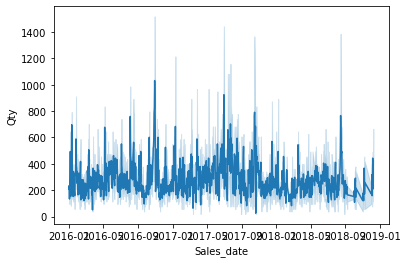

In [214]:
sns.lineplot(y=df['Qty'],x=df.Sales_date)

# plot for 48 inch 2016  data

Text(0.5, 1.0, 'RED=holiday,BLUE=sales')

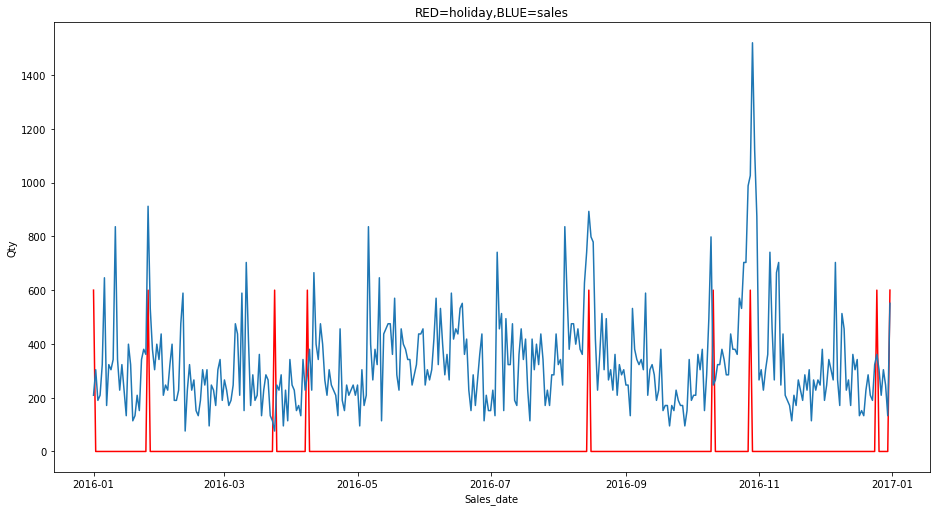

In [215]:
from matplotlib import pyplot
a4_dims = (15.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(y=df48_2016['holiday'],x=df48_2016.Sales_date,color='r')
sns.lineplot(y=df48_2016['Qty'],x=df48_2016.Sales_date)
#ax2 = ax.twinx()
#sns.lineplot(y=df48_2016['holiday'],x=df48_2016.Sales_date, ax=ax2, color='r')

ax.set_title('RED=holiday,BLUE=sales')

# plot for 48 inch 2017  data

Text(0.5, 1.0, 'RED=holiday,BLUE=sales')

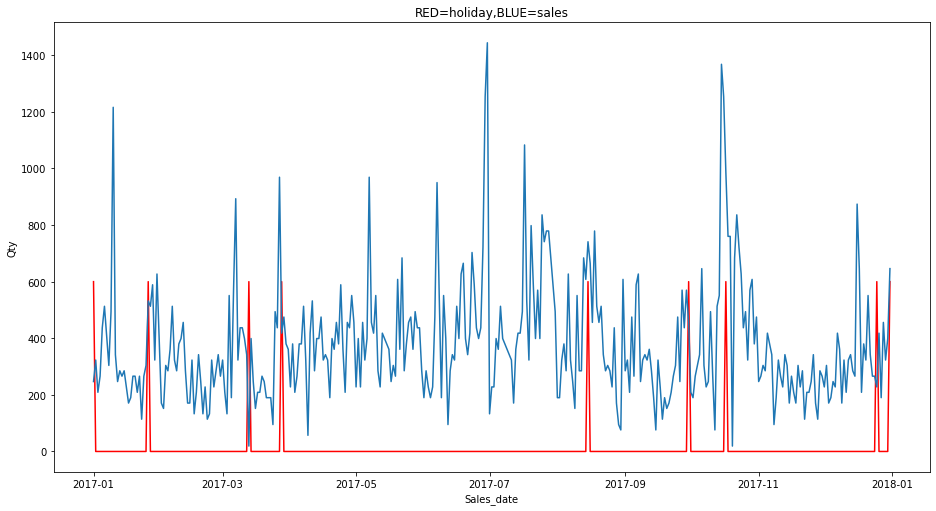

In [216]:
a4_dims = (15.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(y=df48_2017['holiday'],x=df48_2017.Sales_date,color='r')
sns.lineplot(y=df48_2017['Qty'],x=df48_2017.Sales_date)
#ax2 = ax.twinx()
#sns.lineplot(y=df48_2016['holiday'],x=df48_2016.Sales_date, ax=ax2, color='r')

ax.set_title('RED=holiday,BLUE=sales')

# plot for 48 inch 2018  data

Text(0.5, 1.0, 'RED=holiday,BLUE=sales')

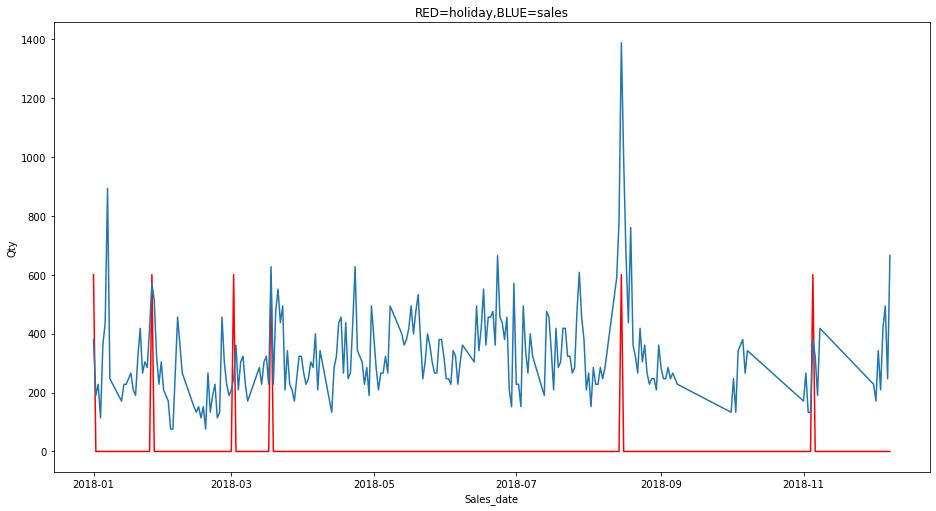

In [217]:
a4_dims = (15.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(y=df48_2018['holiday'],x=df48_2018.Sales_date,color='r')
sns.lineplot(y=df48_2018['Qty'],x=df48_2018.Sales_date)
#ax2 = ax.twinx()
#sns.lineplot(y=df48_2016['holiday'],x=df48_2016.Sales_date, ax=ax2, color='r')

ax.set_title('RED=holiday,BLUE=sales')

# plot for 32 inch 2016 data

Text(0.5, 1.0, 'RED=holiday,BLUE=sales')

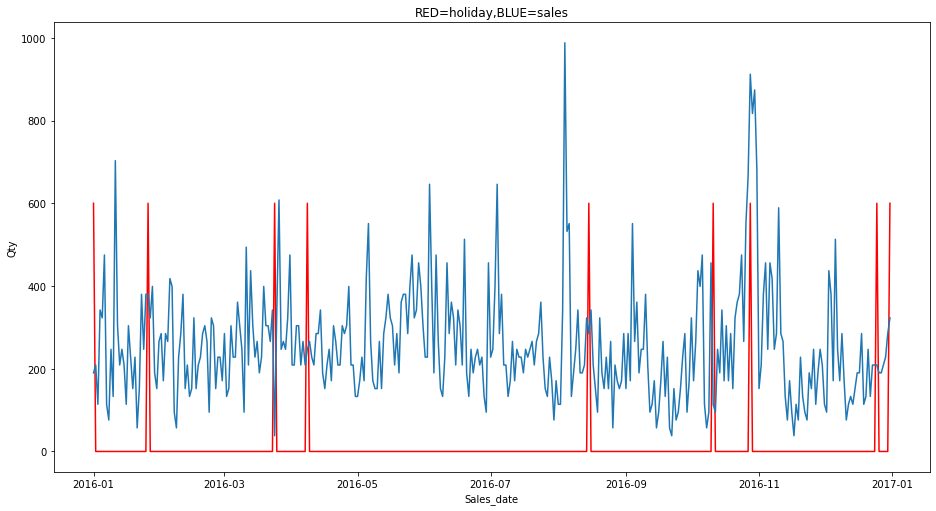

In [218]:
#from matplotlib import pyplot
a4_dims = (15.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(y=df32_2016['holiday'],x=df32_2016.Sales_date,color='r')
sns.lineplot(y=df32_2016['Qty'],x=df32_2016.Sales_date)
#ax2 = ax.twinx()
#sns.lineplot(y=df48_2016['holiday'],x=df48_2016.Sales_date, ax=ax2, color='r')

ax.set_title('RED=holiday,BLUE=sales')

# plot for 32 inch 2017 data

Text(0.5, 1.0, 'RED=holiday,BLUE=sales')

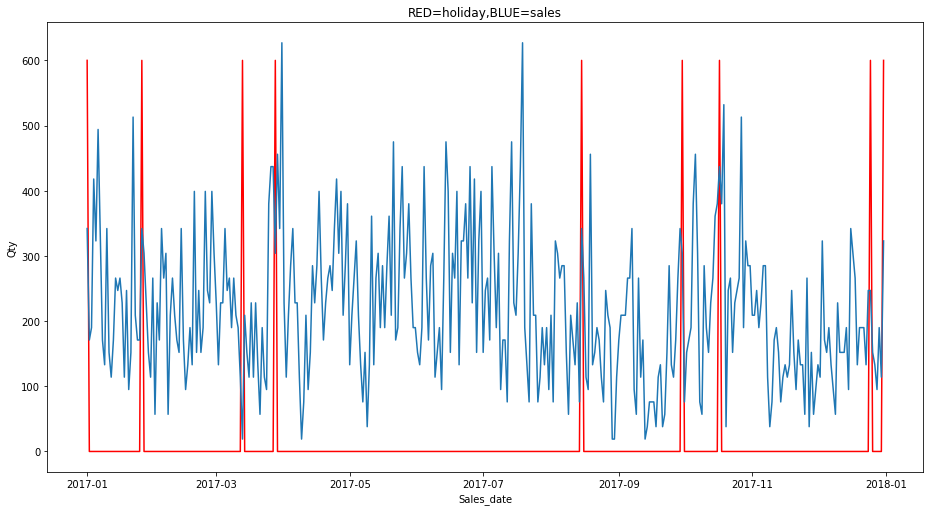

In [219]:
#from matplotlib import pyplot
a4_dims = (15.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(y=df32_2017['holiday'],x=df32_2017.Sales_date,color='r')
sns.lineplot(y=df32_2017['Qty'],x=df32_2017.Sales_date)
#ax2 = ax.twinx()
#sns.lineplot(y=df48_2016['holiday'],x=df48_2016.Sales_date, ax=ax2, color='r')

ax.set_title('RED=holiday,BLUE=sales')

# plot for 32 inch 2018 data

Text(0.5, 1.0, 'RED=holiday,BLUE=sales')

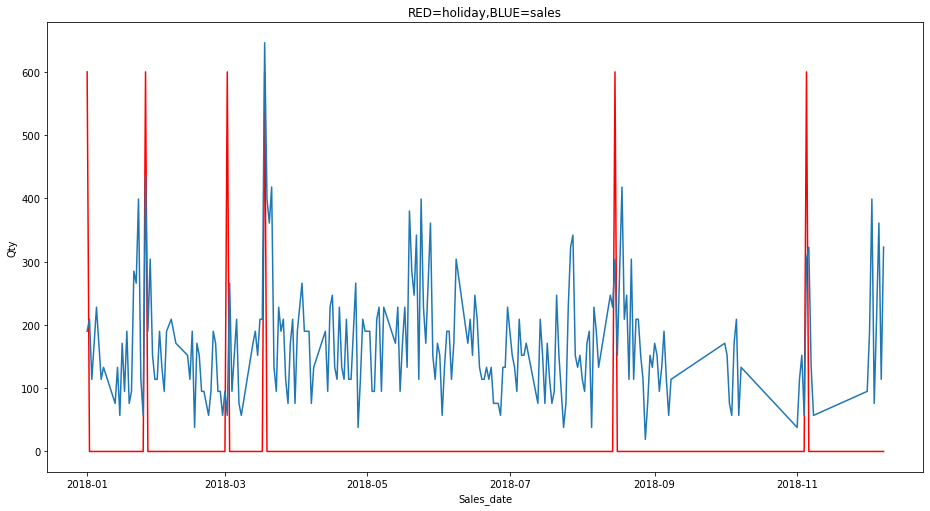

In [220]:
#from matplotlib import pyplot
a4_dims = (15.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(y=df32_2018['holiday'],x=df32_2018.Sales_date,color='r')
sns.lineplot(y=df32_2018['Qty'],x=df32_2018.Sales_date)
#ax2 = ax.twinx()
#sns.lineplot(y=df48_2016['holiday'],x=df48_2016.Sales_date, ax=ax2, color='r')

ax.set_title('RED=holiday,BLUE=sales')

# plot for 55 inch 2016 data

Text(0.5, 1.0, 'RED=holiday,BLUE=sales')

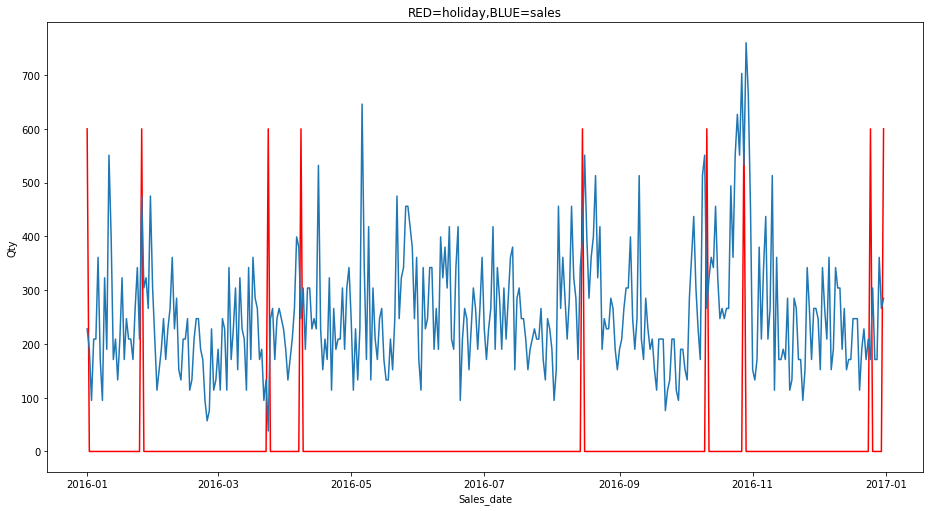

In [221]:
a4_dims = (15.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(y=df55_2016['holiday'],x=df55_2016.Sales_date,color='r')
sns.lineplot(y=df55_2016['Qty'],x=df55_2016.Sales_date)
#ax2 = ax.twinx()
#sns.lineplot(y=df48_2016['holiday'],x=df48_2016.Sales_date, ax=ax2, color='r')

ax.set_title('RED=holiday,BLUE=sales')

# plot for 55 inch 2017 data

Text(0.5, 1.0, 'RED=holiday,BLUE=sales')

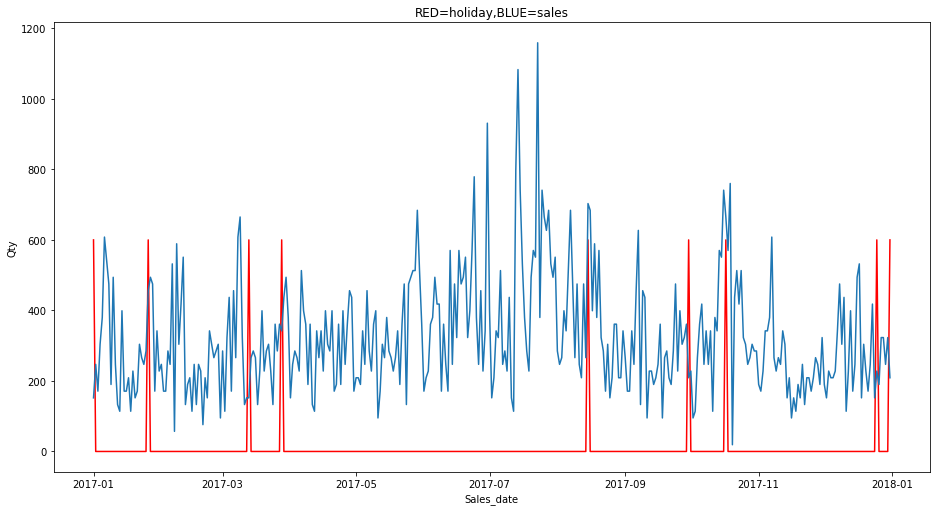

In [222]:
a4_dims = (15.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(y=df55_2017['holiday'],x=df55_2017.Sales_date,color='r')
sns.lineplot(y=df55_2017['Qty'],x=df55_2017.Sales_date)
#ax2 = ax.twinx()
#sns.lineplot(y=df48_2016['holiday'],x=df48_2016.Sales_date, ax=ax2, color='r')

ax.set_title('RED=holiday,BLUE=sales')

# plot for 55 inch 2018 data

Text(0.5, 1.0, 'RED=holiday,BLUE=sales')

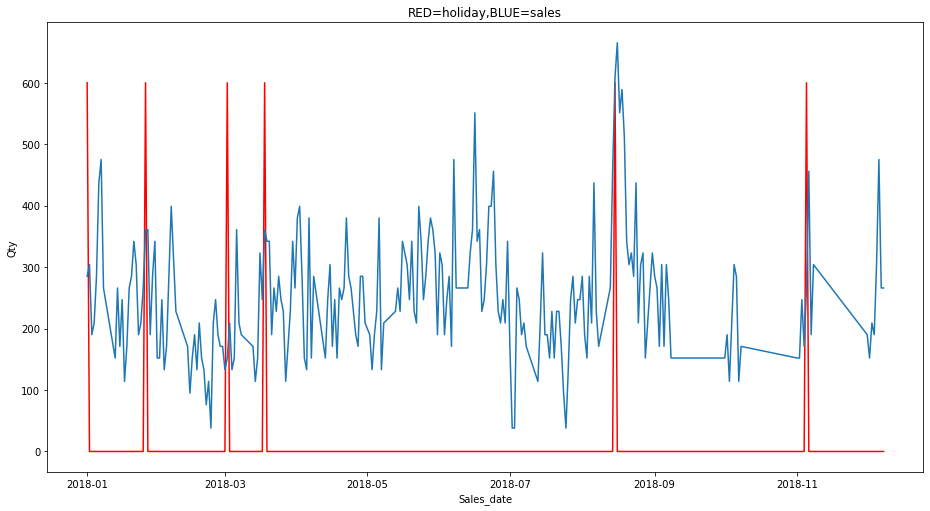

In [223]:
a4_dims = (15.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(y=df55_2018['holiday'],x=df55_2018.Sales_date,color='r')
sns.lineplot(y=df55_2018['Qty'],x=df55_2018.Sales_date)
#ax2 = ax.twinx()
#sns.lineplot(y=df48_2016['holiday'],x=df48_2016.Sales_date, ax=ax2, color='r')

ax.set_title('RED=holiday,BLUE=sales')

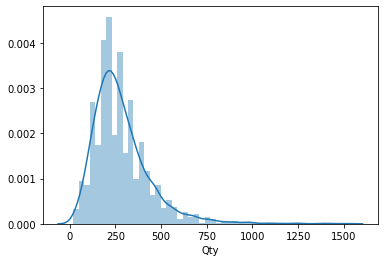

In [224]:
sns.distplot(df.Qty)

In [225]:
df

,subsegment,Sales_date,Qty,holiday
0,32 inch,2016-01-01,190.0,600
1,55 inch,2016-01-01,228.0,600
2,48 inch,2016-01-01,209.0,600
3,55 inch,2016-01-02,190.0,0
4,48 inch,2016-01-02,304.0,0
...,...,...,...,...
2900,55 inch,2018-12-07,266.0,0
2901,48 inch,2018-12-07,247.0,0
2902,32 inch,2018-12-08,323.0,0
2903,55 inch,2018-12-08,266.0,0


# checking for trend and seasonality and residual

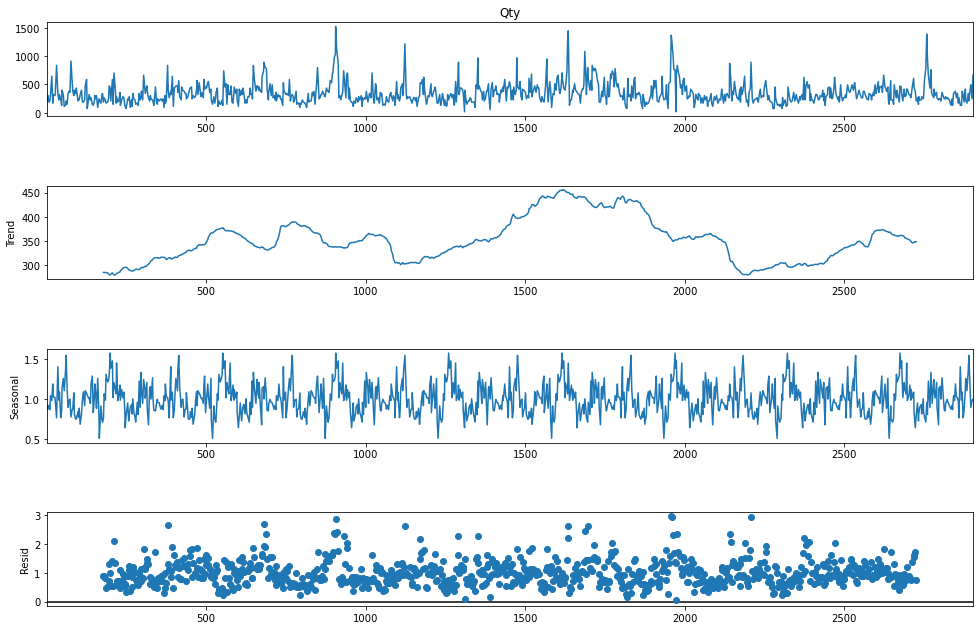

In [226]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(df48['Qty'],model='mul',period=118);
fig=seas_d.plot()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

# DICKEY FULLER tests  to find out if the data set is stationary or not

In [227]:

X = df.Qty
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
p=result[1]
print('')
if p<= 0.05:
    print('Data set is stationary')
else:
    print('Data set is non-stationary')

ADF Statistic: -10.222953
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567

Data set is stationary


In [228]:
df_copy.drop(['subsegment','holiday'],axis=1,inplace=True)

In [229]:
df48.set_index('Sales_date')

,subsegment,Qty,holiday,year
Sales_date,,,,
2016-01-01,48 inch,209.0,600,2016
2016-01-02,48 inch,304.0,0,2016
2016-01-03,48 inch,190.0,0,2016
2016-01-04,48 inch,209.0,0,2016
2016-01-05,48 inch,323.0,0,2016
...,...,...,...,...
2018-12-04,48 inch,209.0,0,2018
2018-12-05,48 inch,418.0,0,2018
2018-12-06,48 inch,494.0,0,2018


In [230]:
df48.drop(['subsegment','holiday','year'],axis=1,inplace=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# since the drop is significant that indecates that the data is stationary

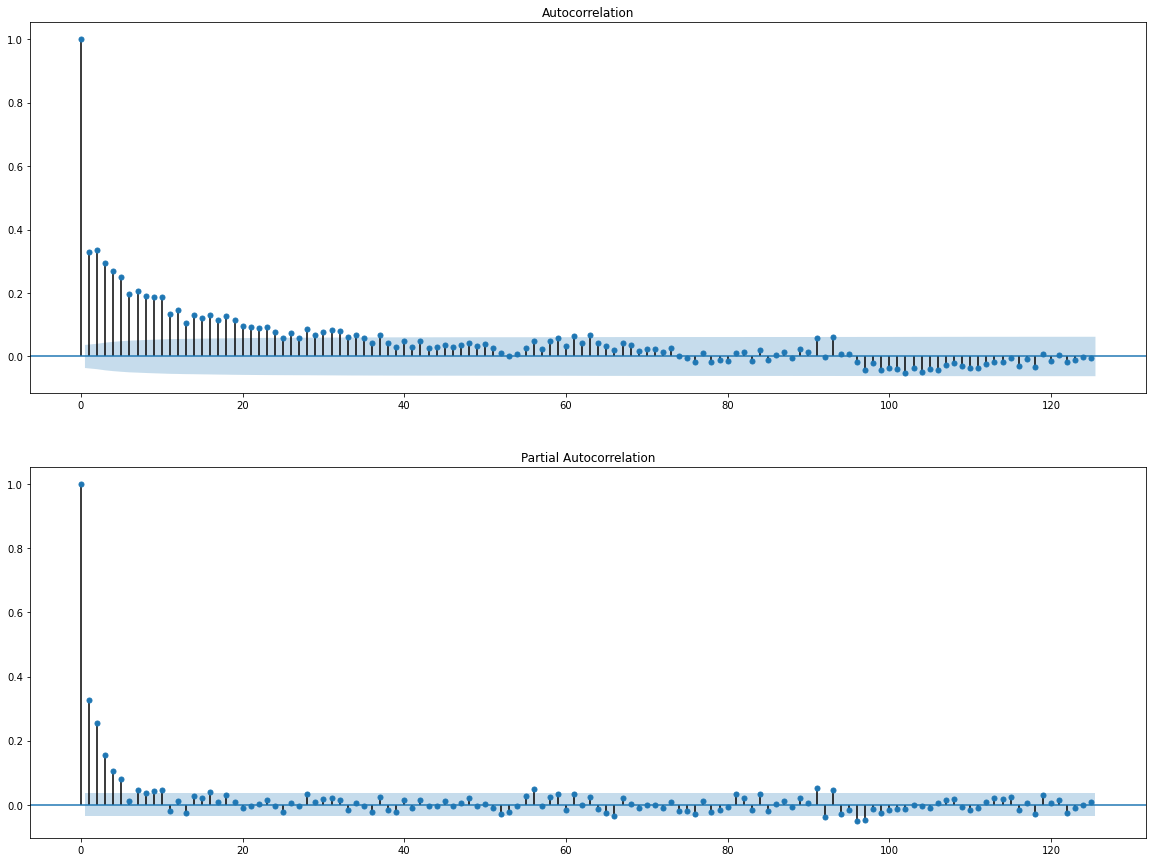

In [231]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig, ax = plt.subplots(2,1,figsize=(20,15))
fig = sm.graphics.tsa.plot_acf(df['Qty'], lags=125, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(df['Qty'], lags=125, ax=ax[1])


plt.show()

# p and P both equal 1 (significant positive spikes in ACF and PACF plots)
# d and D both equal 1 (first difference and seasonal difference)
# q and Q both equal 1 (significant negative spikes, PACF decay is more  
# gradual)
# s equal to 15 (significant negative spikes after 15)

In [232]:
df48=df48.set_index('Sales_date')

# spliting test and train

In [233]:
train= df48['Qty'][:800].dropna().values
test= df48['Qty'][800:969].dropna().values
train

array([ 209.,  304.,  190.,  209.,  323.,  646.,  171.,  323.,  304.,
        342.,  836.,  342.,  228.,  323.,  228.,  133.,  399.,  323.,
        114.,  133.,  209.,  152.,  342.,  380.,  361.,  912.,  532.,
        380.,  304.,  399.,  342.,  437.,  209.,  247.,  228.,  323.,
        399.,  190.,  190.,  228.,  475.,  589.,   76.,  228.,  323.,
        228.,  266.,  152.,  133.,  190.,  304.,  247.,  304.,   95.,
        247.,  228.,  171.,  304.,  342.,  190.,  266.,  228.,  171.,
        190.,  247.,  475.,  437.,  209.,  589.,  152.,  703.,  418.,
        171.,  285.,  190.,  209.,  361.,  133.,  228.,  285.,  266.,
        133.,  114.,   76.,  247.,  228.,  285.,   95.,  228.,  114.,
        342.,  247.,  228.,  152.,  171.,  133.,  342.,  228.,  285.,
        380.,  228.,  665.,  399.,  342.,  475.,  399.,  266.,  209.,
        304.,  247.,  228.,  209.,  133.,  456.,  190.,  152.,  247.,
        209.,  228.,  247.,  209.,  247.,   95.,  304.,  171.,  209.,
        836.,  399.,

# training,predicting and forecasting the model

In [234]:
model = sm.tsa.statespace.SARIMAX(train, order=(1,1,1),seasonal_order=(1, 1, 1,118),trend='c',freq=None).fit()
#'n','c','t','ct'
# seasonal=118 gives 

In [239]:
predictions= model.predict(steps =1)

In [240]:
forecast= model.forecast(steps =169)


# plotting of prediction and forecasting graph

Text(0.5, 1.0, 'Blue=Original sales,Orange= Predicted sales')

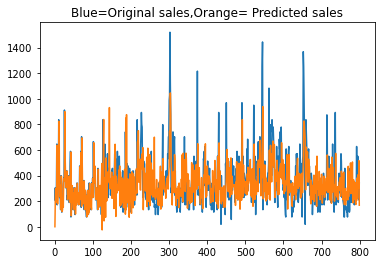

In [241]:
plt.plot(train)
plt.plot(predictions)
plt.title("Blue=Original sales,Orange= Predicted sales") 

Text(0.5, 1.0, 'Blue=Original sales,Orange= forecasted sales')

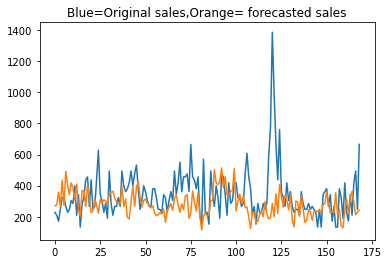

In [243]:
#118
plt.plot(test)
plt.plot(forecast)
plt.title("Blue=Original sales,Orange= forecasted sales") 